In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import glob

In [ ]:
model = VGG16()

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Inferencing / Generating Predictions

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
imagenet_classes = pd.read_json(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\imagenet_class_index.json", )
imagenet_classes = imagenet_classes.T[[1]]
imagenet_classes.columns = ["Class"]
imagenet_classes_dict = imagenet_classes.to_dict()["Class"]

In [ ]:
imagenet_classes

,Class
0,tench
1,goldfish
2,great_white_shark
3,tiger_shark
4,hammerhead
...,...
995,earthstar
996,hen-of-the-woods
997,bolete
998,ear


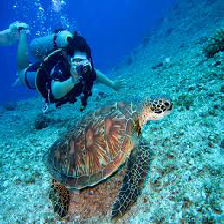

In [ ]:
image_for_pred = load_img(r"C:\Users\phani\Downloads\scuba.jpg", target_size=(224,224))
image_for_pred

In [ ]:
image_for_pred = np.array(image_for_pred)
image_for_pred = image_for_pred.reshape(1, 224, 224, 3)

In [ ]:
preds = model.predict(image_for_pred)
preds.shape

1/1 [==============================] - 0s 275ms/step


(1, 1000)

In [ ]:
pd.DataFrame({"Preds": preds.flatten(), "Classes":imagenet_classes["Class"]}).sort_values(by="Preds", ascending=False).head(10)

,Preds,Classes
36,0.721522,terrapin
33,0.138358,loggerhead
35,0.023941,mud_turtle
34,0.020127,leatherback_turtle
116,0.015296,chiton
801,0.014180,snorkel
125,0.013475,hermit_crab
107,0.010709,jellyfish
983,0.009437,scuba_diver
973,0.006839,coral_reef


In [ ]:
imagenet_classes.values()

dict_values(['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl', 'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana', 'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard', 'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon', 'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake', 'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake', 'water_snake', 'vine_snake', 'night_snake', 'boa_constrictor', 'rock_python', 'Indian_cobra', 'green_mamba', 'sea_snake', 'horned_viper', 'di

In [ ]:
imagenet_classes[np.argmax(preds)]

'terrapin'

### Finetuning on specific datasets

In [ ]:
pretrained_model = VGG16() # Out of the box VGG16 model

In [ ]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_for_cars_planes = Sequential() # Empty model

for layer in pretrained_model.layers[:-1]:
    layer.trainable = False
    model_for_cars_planes.add(layer)

In [ ]:
model_for_cars_planes.add(Dense(1, activation="sigmoid"))

In [ ]:
model_for_cars_planes.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
x = []
y = []
labels_list = ["Cars","Planes"]
for label in labels_list:
    path_string = f"archive/ImagesToTest/ImagesToTrain/{label}/*.jpg"
    for path in glob.glob(path_string):
        input_image = load_img(path, target_size=(224,224))
        input_image = np.array(input_image)
        input_image = preprocess_input(input_image)
        x.append(input_image)
        if label == "Cars": # 0 - Cars, 1 - Planes
            y.append(0)
        else:
            y.append(1)

In [ ]:
# from tensorflow.keras.utils import image_dataset_from_directory

# final_data = image_dataset_from_directory(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\archive\ImagesToTest\ImagesToTrain",
#                                           image_size=(224,224))

# for element in final_data:
#     print(element)

Found 100 files belonging to 2 classes.


In [ ]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(100, 224, 224, 3)
(100,)


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model_for_cars_planes.compile(optimizer="adam", loss="binary_crossentropy", metrics="Accuracy")
model_for_cars_planes.fit(x=x, y=y, epochs=10, validation_split=0.3, shuffle=True)

Epoch 1/10
3/3 [==============================] - 17s 5s/step - loss: 0.7918 - Accuracy: 0.6571 - val_loss: 0.2276 - val_Accuracy: 0.8667
Epoch 2/10
3/3 [==============================] - 14s 5s/step - loss: 0.0768 - Accuracy: 1.0000 - val_loss: 0.0975 - val_Accuracy: 0.9667
Epoch 3/10
3/3 [==============================] - 14s 5s/step - loss: 0.0141 - Accuracy: 1.0000 - val_loss: 0.0643 - val_Accuracy: 0.9667
Epoch 4/10
3/3 [==============================] - 14s 5s/step - loss: 0.0046 - Accuracy: 1.0000 - val_loss: 0.0493 - val_Accuracy: 0.9667
Epoch 5/10
3/3 [==============================] - 14s 5s/step - loss: 0.0018 - Accuracy: 1.0000 - val_loss: 0.0417 - val_Accuracy: 0.9667
Epoch 6/10
3/3 [==============================] - 14s 5s/step - loss: 0.0010 - Accuracy: 1.0000 - val_loss: 0.0372 - val_Accuracy: 0.9667
Epoch 7/10
3/3 [==============================] - 14s 5s/step - loss: 6.7594e-04 - Accuracy: 1.0000 - val_loss: 0.0343 - val_Accuracy: 0.9667
Epoch 8/10
3/3 [==============

In [ ]:
new_img = load_img(r"C:\Users\phani\Downloads\car.jpg", target_size=(224,224))
new_img = np.array(new_img)
new_img = preprocess_input(new_img)
new_img = new_img.reshape(1,224,224,3)

In [ ]:
model_for_cars_planes.predict(new_img)

1/1 [==============================] - 1s 503ms/step


array([[5.1069226e-05]], dtype=float32)